In [1]:
from Models.Charts import Charts
from Models.Enunciados import Enunciados

In [2]:
file = 'datos/avocado.csv'
chart = Charts(file)
# FILTRAMOS POR LAS 10 REGIONES CON MAS VOLUMEN DE VENTAS
chart.topRegions(num=11,exclude='TotalUS')
#Hacemos una limpieza la columna Unnamed
chart.clearData('Unnamed: 0')
# Comprobamos si hay valores nulos
chart.isNull()
chart.showData()
enun = Enunciados()
chart.region_labels
chart.df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
312,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
313,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
314,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
315,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
316,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


1.1 | **Descomposición de Series Temporales de Precios:** 
   
**Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


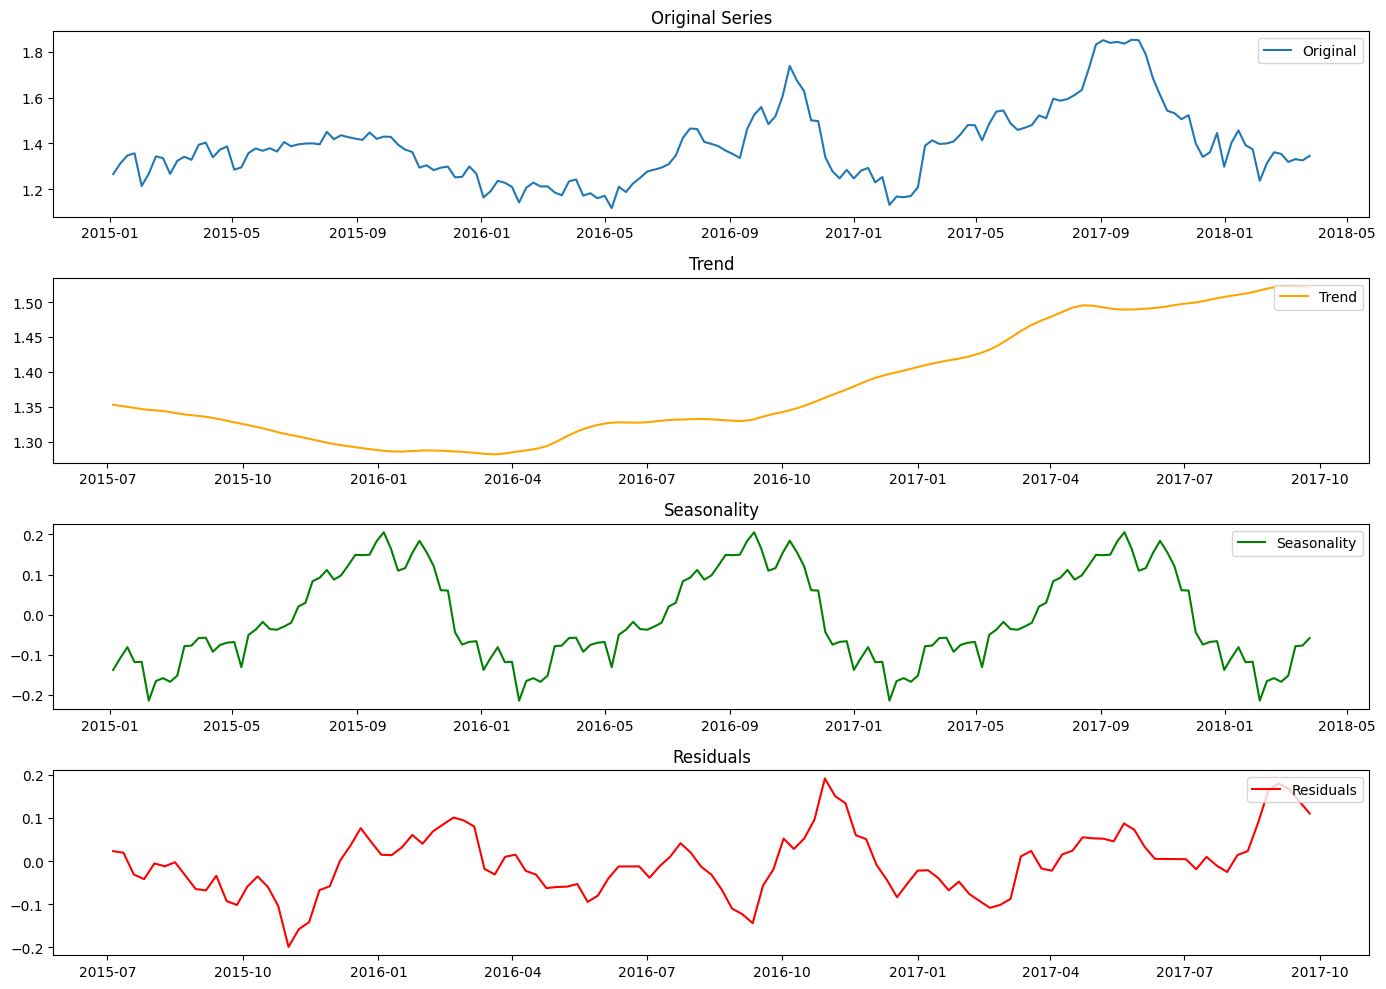

In [29]:
enun.getEnunciado("1.1")
grouped_1_1 = chart.df.copy()
# Agrupar por Date y calcular el promedio de AveragePrice
grouped_1_1 = grouped_1_1.groupby('Date')['AveragePrice'].mean()

# Descomposición de la serie temporal
decomposition = chart.seasonal_decompose(grouped_1_1, model='additive', period=52)

# Visualización de los componentes descompuestos
chart.plt.figure(figsize=(14, 10))

chart.plt.subplot(4, 1, 1)
chart.plt.plot(grouped_1_1, label='Original')
chart.plt.title('Original Series')
chart.plt.legend(loc='upper right')

chart.plt.subplot(4, 1, 2)
chart.plt.plot(decomposition.trend, label='Trend', color='orange')
chart.plt.title('Trend')
chart.plt.legend(loc='upper right')

chart.plt.subplot(4, 1, 3)
chart.plt.plot(decomposition.seasonal, label='Seasonality', color='green')
chart.plt.title('Seasonality')
chart.plt.legend(loc='upper right')

chart.plt.subplot(4, 1, 4)
chart.plt.plot(decomposition.resid, label='Residuals', color='red')
chart.plt.title('Residuals')
chart.plt.legend(loc='upper right')

chart.plt.tight_layout()
chart.plt.show()

1.2 | **Análisis de Estacionalidad por Región:** 
   
**Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.


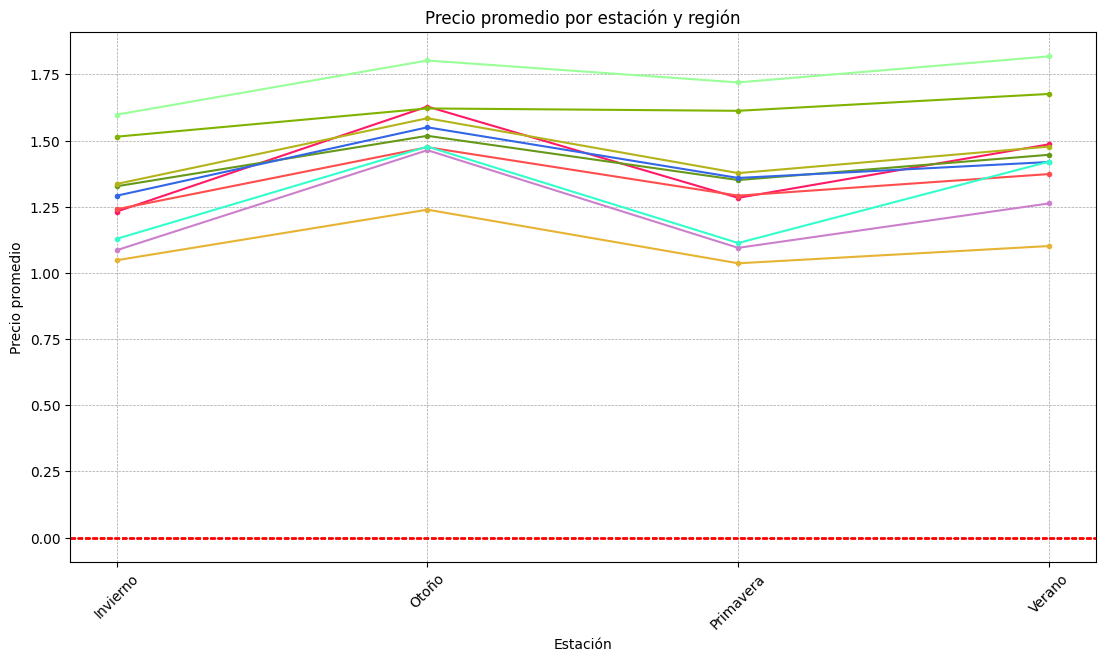

**1.2 Explicación:**
 - **Cada línea representa una región específica y permite observar las tendencias estacionales en los precios. 
 - **Por ejemplo, se pueden identificar picos o caídas en precios en ciertas épocas, lo que refleja la oferta y demanda.

In [4]:
enun.getEnunciado("1.2")
chart.df['year'] = chart.df['Date'].dt.year
chart.df['month'] = chart.df['Date'].dt.month
chart.df['season'] = chart.df['month'].apply(chart.temporada)

promedio_anual = chart.df.groupby(['region', 'season'])['AveragePrice'].mean().reset_index()
chart.figureConfig(11,6)
# Itera sobre cada región para graficar su línea
for region in promedio_anual['region'].unique():
    region_data = promedio_anual[promedio_anual['region'] == region]
    chart.plot(region_data['season'], region_data['AveragePrice'],
               title='Precio promedio por estación y región',
               xlabel="Estación",ylabel="Precio promedio",marker=".",show=False)

# chart.plot_bar(region_data['season'],region_data['AveragePrice'],title="Precio promedio",xlabel="Estación",ylabel="Precio Promedio")
chart.show()
enun.getExplicacion("1.2")

1.3 | **Comparación de Precios Promedio Mensuales:** 
   
**Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


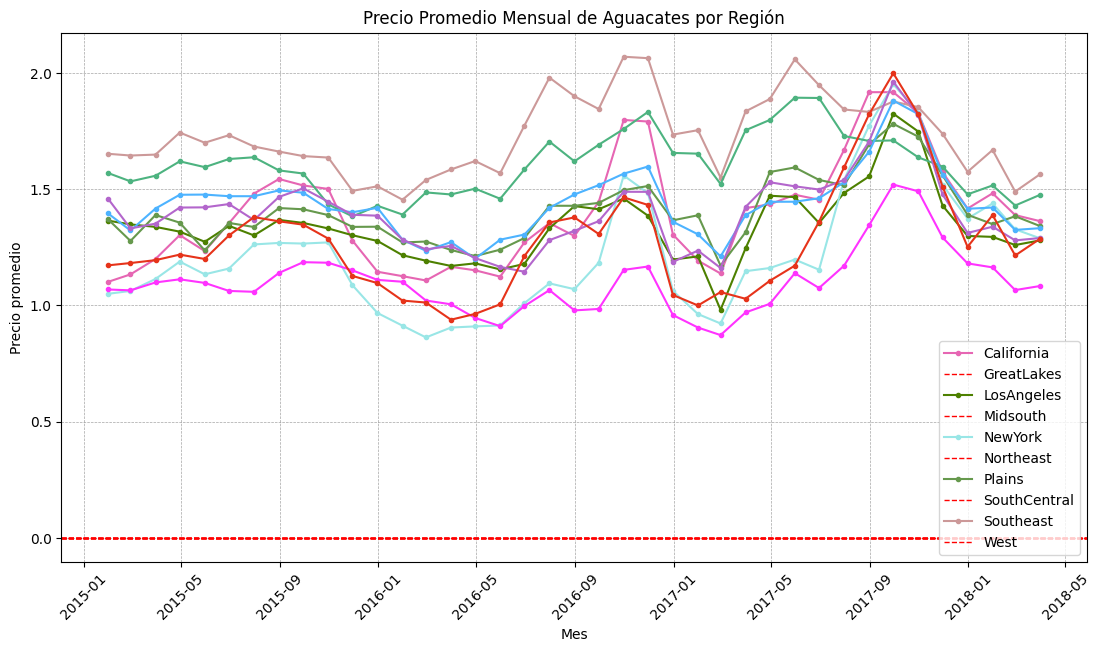

In [5]:
enun.getEnunciado("1.3")
promedio_mensual = chart.df.groupby(chart.pd.Grouper(key='Date', freq='ME'))['AveragePrice'].mean().reset_index()

# Ahora agrupar por 'region' y por mes para calcular el promedio
promedio_mensual_region = chart.df.groupby(['region', chart.pd.Grouper(key='Date', freq='ME')])['AveragePrice'].mean().reset_index()

# Tamaño de la figura para el gráfico por región
chart.figureConfig(11,6)

promedio_mensual_region['region'] = promedio_mensual_region['region'].fillna(0)
# Graficar el promedio mensual de AveragePrice por región
for region in promedio_mensual_region['region'].unique():
    region_data = promedio_mensual_region[promedio_mensual_region['region'] == region]
    chart.plot(region_data['Date'], region_data['AveragePrice'],
               title='Precio Promedio Mensual de Aguacates por Región',label=region,
               xlabel="Mes",ylabel="Precio promedio",marker=".",show=False)

chart.plt.legend(chart.region_labels,loc="lower right")
chart.show()

1.4 | **Tendencia de Ventas a lo Largo del Tiempo:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.


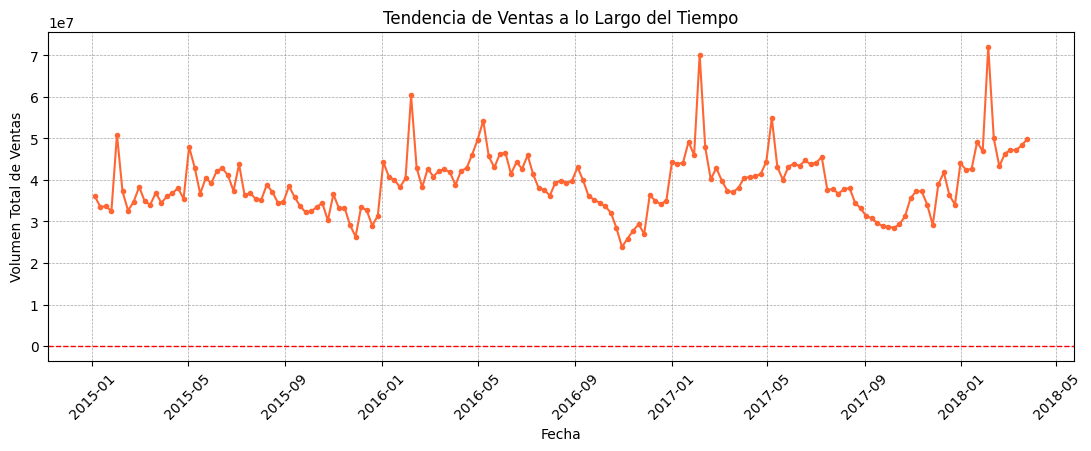

In [6]:
enun.getEnunciado("1.4")
# Agrupar por fecha y sumar el volumen total
df_grouped = chart.df.groupby('Date')['Total Volume'].sum()
chart.figureConfig(11,4)
chart.plot(df_grouped.index, df_grouped.values,
               title='Tendencia de Ventas a lo Largo del Tiempo',label='Volumen Total',
               xlabel="Fecha",ylabel="Volumen Total de Ventas",marker=".",show=True)

1.5 | **Análisis de Cambios en Precios Anuales:** 
   
**Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.


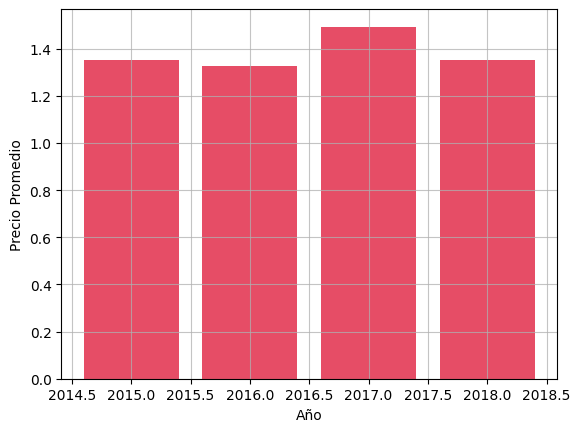

**1.5 Explicación:**
 - He quitado el año 2018 ya que no tenemos el año completo y no seria una evaluación real de los datos.** 
- He agrupado los datos por año y calculado el promedio de AveragePrice para cada año. 
 - He representado los resultados en un gráfico de barras para comparar los precios de cada año. -- Vemos un incremento del precio medio de los aguacates en 2017 respecto a 2015 y 2016. 
 - Añadiendo la linea plt.xticks convertirmos los años en enteros evitando que se muestren en notación científica.

In [7]:
enun.getEnunciado("1.5")

promedio_year =  chart.df.groupby('year')['AveragePrice'].mean().reset_index()
chart.plot_bar(promedio_year['year'], promedio_year['AveragePrice'],
               title="Cambios en el Precio Promedio de Aguacates por Año",
               xlabel="Año",ylabel="Precio Promedio",show=True)

enun.getExplicacion("1.5")

2.1 | **Gráfico de Violín de Volumen de Ventas por Región:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.


**2.1 Explicación:**
 - Cada violín indica **la densidad de la distribución** del volumen de ventas de cada región.
 - La forma y el ancho del violín a lo largo del eje Y representan cuántas observaciones están dentro de ese rango de Total Volume para la región dada. Un violín más ancho en un área específica significa más datos en ese rango de ventas. 
 - En cada violín puedes ver una línea central que marca la mediana, y a veces otras líneas para los cuartiles, dependiendo de la configuración predeterminada.

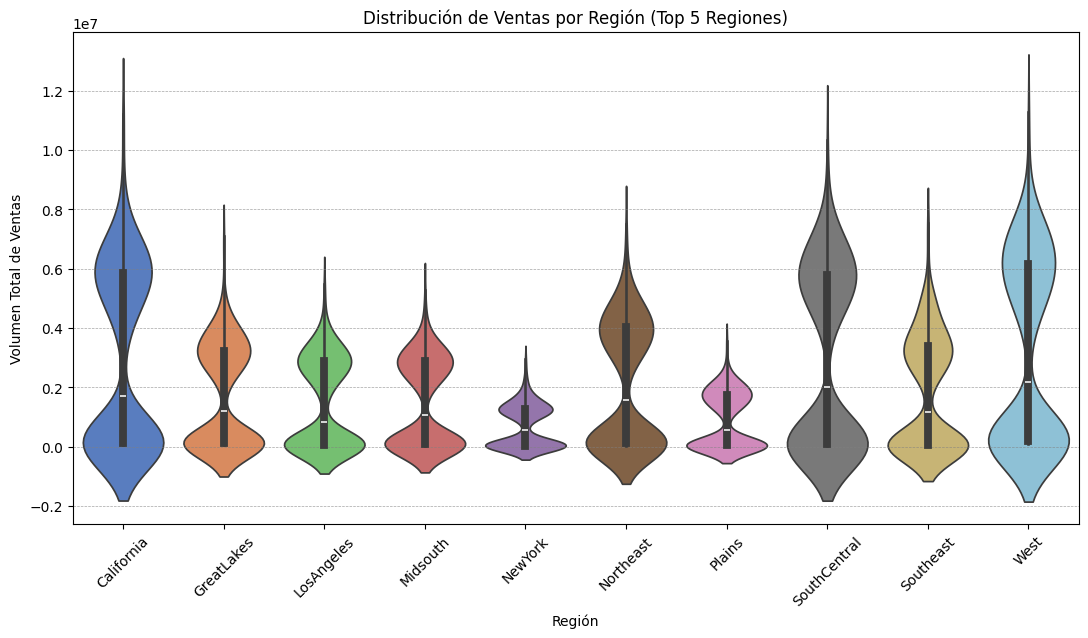

In [8]:
enun.getEnunciado("2.1")
chart.figureConfig(title="Distribución de Ventas por Región (Top 5 Regiones)",xlabel="Región",ylabel="Volumen Total de Ventas")
chart.sns.violinplot(x='region', y='Total Volume', data=chart.df, hue='region', palette="muted", dodge=False, legend=False)
enun.getExplicacion("2.1")

2.2 | **Boxplot Comparativo de Precios entre Años:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.


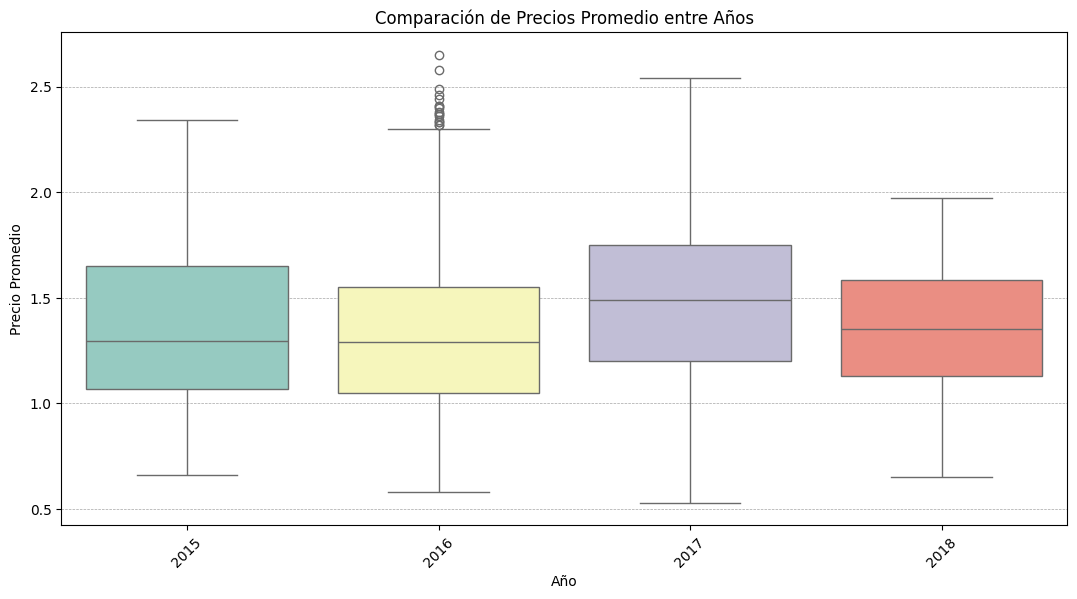

**2.2 Explicación:**
 

In [9]:
enun.getEnunciado("2.2")
chart.figureConfig(title='Comparación de Precios Promedio entre Años',ylabel='Precio Promedio',xlabel='Año')
chart.sns.boxplot(x='year', y='AveragePrice', data=chart.df, palette="Set3", hue='year', legend=False)
chart.show()
enun.getExplicacion("2.2")

2.3 | **Histograma de Volumen Total de Ventas:** 
   
 - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.


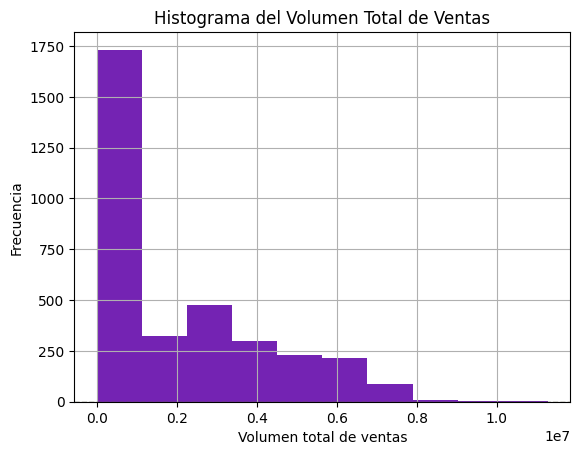

**2.3 Explicación:**
 **bins**  
**int o secuencia, predeterminado 10**  
Número de *bins* (intervalos) para el histograma. Si se proporciona un número entero, se calculan y devuelven los bordes de los bins como `bins + 1`. Si se proporciona una secuencia, se especifican los bordes de los bins, incluyendo el borde izquierdo del primer bin y el borde derecho del último bin. En este caso, se devuelve `bins` sin modificar.

In [10]:
enun.getEnunciado("2.3")
chart.plot_hist(chart.df['Total Volume'],
                title="Histograma del Volumen Total de Ventas",
                xlabel="Volumen total de ventas",
                ylabel="Frecuencia",
                color=chart.getColor(),
                alpha=0.7)

enun.getExplicacion("2.3")

2.4 | **Gráfico de Barras de Ventas por Tipo de Bolsa:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.


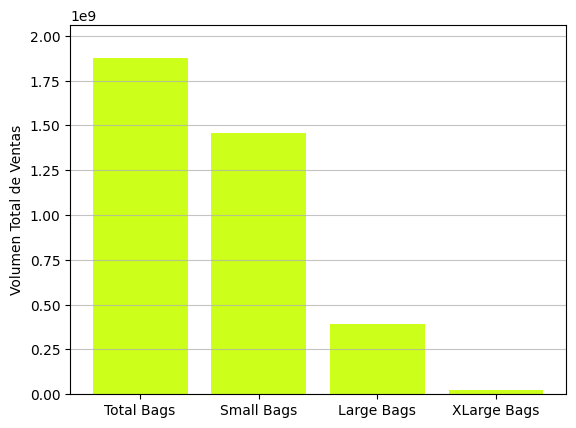

**2.4 Explicación:**
 

In [11]:
enun.getEnunciado("2.4")
total_bags = chart.df['Total Bags'].sum()
small_bags = chart.df['Small Bags'].sum()
large_bags = chart.df['Large Bags'].sum()
xlarge_bags = chart.df['XLarge Bags'].sum()
total_volume = chart.df['Total Volume']
# Crear una lista de tipos de bolsas y sus correspondientes ventas
labels = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
sales = [total_bags, small_bags, large_bags, xlarge_bags]
# Crear el gráfico de barras
chart.plot_bar(labels,
               sales,
               title="Comparación de Ventas por Tipo de Bolsa",
               xlabel="",
               ylabel="Volumen Total de Ventas",
               ylim=(0, max(sales) * 1.1),
               axis='y', alpha=0.75)

enun.getExplicacion("2.4")

2.5 | **Gráfico de Líneas de Precios Promedios por Año:** 
   
- **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.


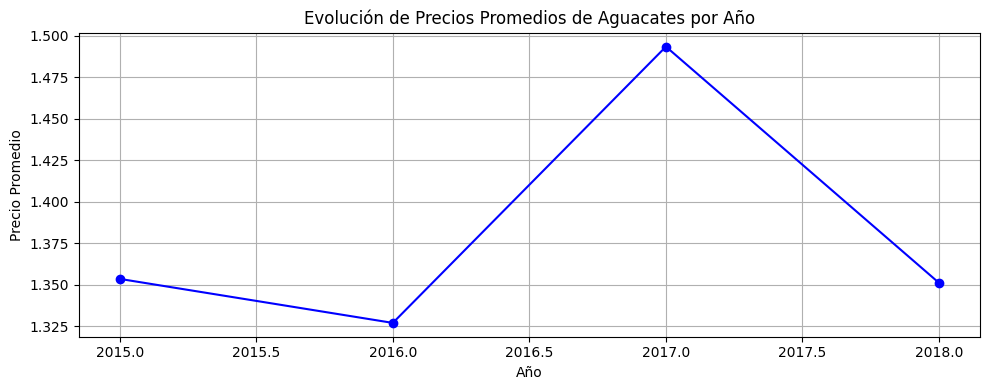

**2.5 Explicación:**
 

In [12]:
enun.getEnunciado("2.5")


# Asegúrate de que la columna 'Date' esté en formato datetime y extrae el año
chart.df['year'] = chart.year

# Agrupa por año y calcula el promedio de los precios
promedio_por_año = chart.df.groupby('year')['AveragePrice'].mean()

# Crea el gráfico de líneas
chart.plt.figure(figsize=(10, 4))
chart.plt.plot(promedio_por_año.index, promedio_por_año.values, marker='o', color='b', linestyle='-')
chart.plt.title("Evolución de Precios Promedios de Aguacates por Año")
chart.plt.xlabel("Año")
chart.plt.ylabel("Precio Promedio")
chart.plt.grid(True)
chart.plt.tight_layout()
chart.plt.show()


enun.getExplicacion("2.5")

3.1 | **Elasticidad Precio-Demanda por Año:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.


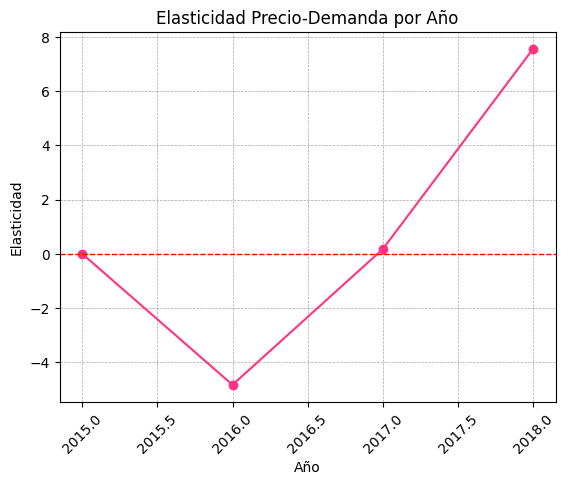

**3.1 Explicación:**
 

In [13]:
enun.getEnunciado("3.1")

# Añadir columna 'year'
chart.df['year'] = chart.df['Date'].dt.year

# Agrupar por año y calcular la suma de Total Volume y el promedio de AveragePrice
yearly_data = chart.df.groupby('year').agg(
    {
        'Total Volume': 'sum', 
        'AveragePrice': 'mean'
    }
).reset_index()

# Calcular la variación porcentual
yearly_data['Volume_pct_change'] = yearly_data['Total Volume'].pct_change()
yearly_data['Price_pct_change'] = yearly_data['AveragePrice'].pct_change()

# Calcular la elasticidad
yearly_data['Elasticity'] = (yearly_data['Volume_pct_change'] / yearly_data['Price_pct_change']).fillna(0)

# Visualizar resultados
chart.plot(yearly_data['year'], yearly_data['Elasticity'], title='Elasticidad Precio-Demanda por Año',
           xlabel='Año',ylabel='Elasticidad',marker='o',show=True)

#   # Línea de referencia
enun.getExplicacion("3.1")

3.2 | **Comparación de Elasticidad en Diferentes Mercados:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.


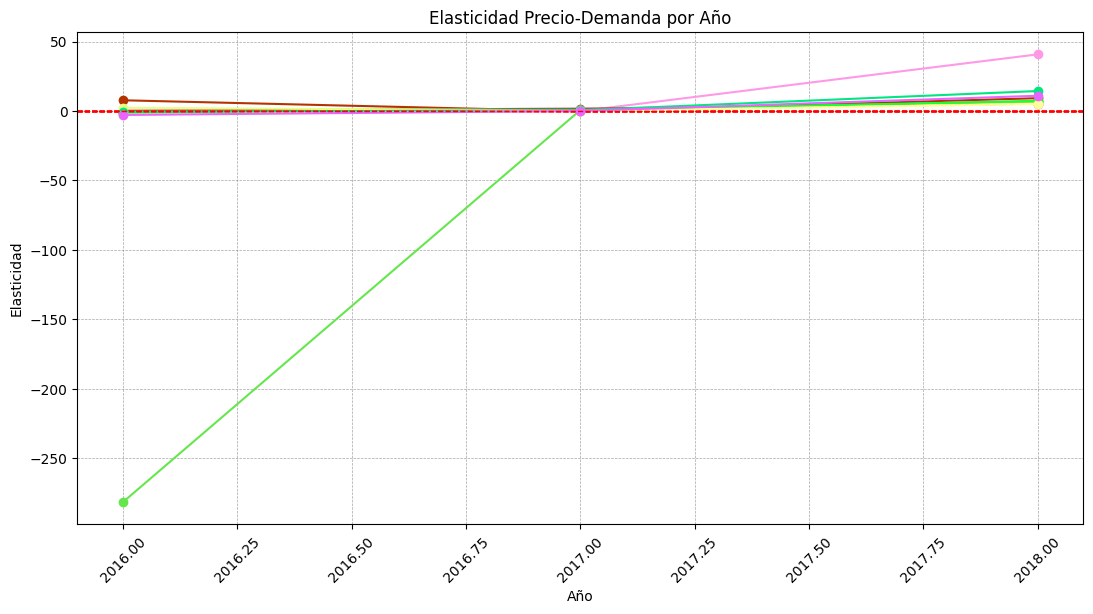

In [14]:
enun.getEnunciado("3.2")
chart.df['Date'] = chart.pd.to_datetime(chart.df['Date'])
chart.df['year'] = chart.df['Date'].dt.year

# Agrupamos por 'region' y 'year' y calculamos el volumen total y precio promedio anual
df_grouped = chart.df.groupby(['region', 'year']).agg(
    {
        'Total Volume': 'sum', 
        'AveragePrice': 'mean'
    }
).reset_index()

# Calculamos el cambio porcentual por región para 'Total Volume' y 'AveragePrice'
df_grouped['pct_change_volume'] = df_grouped.groupby('region')['Total Volume'].pct_change()
df_grouped['pct_change_price'] = df_grouped.groupby('region')['AveragePrice'].pct_change()


# Calculamos la elasticidad para cada región y año
df_grouped['elasticity'] = df_grouped['pct_change_volume'] / df_grouped['pct_change_price']

# Filtramos los valores NaN que pueden haber resultado del cálculo de pct_change en los primeros valores
df_elasticity = df_grouped.dropna(subset=['elasticity'])

chart.figureConfig(title="Comparación de Elasticidad en Diferentes Mercados",xlabel="Year",ylabel="Elasticidad")

for region in df_elasticity['region'].unique():
    region_data = df_elasticity[df_elasticity['region'] == region]
    chart.plot(region_data['year'],region_data['elasticity'],label=region_data['region'], 
           title='Elasticidad Precio-Demanda por Año',xlabel='Año',ylabel='Elasticidad',marker='o',show=False)
    
chart.show()

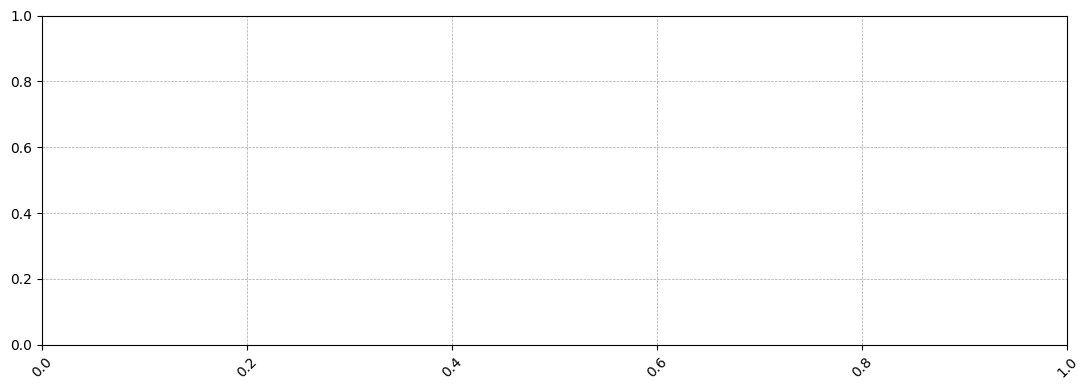

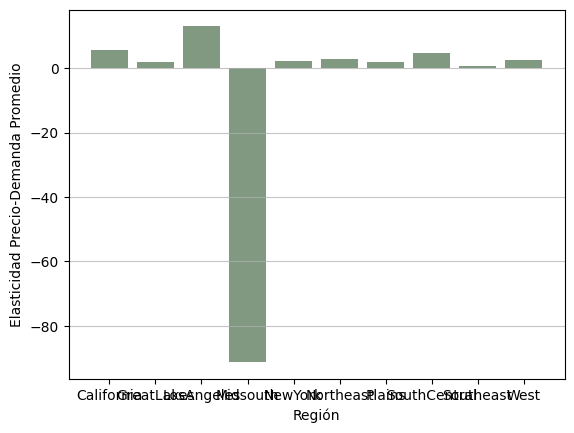

**3.2 Explicación:**
 

In [15]:
# Continuacion 3.2
# Presenta un gráfico de barras que muestre la elasticidad por región usando plt.bar().

chart.df['Date'] = chart.pd.to_datetime(chart.df['Date'])
chart.df['year'] = chart.df['Date'].dt.year

# Agrupo por año y región, y calcula el promedio de 'AveragePrice' y la suma de 'Total Volume'
el_price_vs_demanda = chart.df.groupby(['year', 'region']).agg({
    'Total Volume': 'sum',
    'AveragePrice': 'mean'
}).reset_index()

# Calcula el cambio porcentual de volumen y precio para cada región
# pct_change() es Cambio porcentual

el_price_vs_demanda['pct_change_volume'] = el_price_vs_demanda.groupby('region')['Total Volume'].pct_change().fillna(0)
el_price_vs_demanda['pct_change_price'] = el_price_vs_demanda.groupby('region')['AveragePrice'].pct_change().fillna(0)

# Calcula la elasticidad como el cociente entre el cambio porcentual de volumen y de precio
el_price_vs_demanda['elasticidad'] = el_price_vs_demanda['pct_change_volume'] / el_price_vs_demanda['pct_change_price']

# Filtra regiones sin valores NaN en elasticidad
elasticidad_por_region = el_price_vs_demanda.dropna(subset=['elasticidad'])

# Agrupa por región para obtener la elasticidad promedio de cada región
elasticidad_media_por_region = elasticidad_por_region.groupby('region')['elasticidad'].mean().reset_index()
chart.figureConfig(11,4)
chart.plot_bar(elasticidad_media_por_region['region'], elasticidad_media_por_region['elasticidad'],
               title="Elasticidad Precio-Demanda por Región",xlabel="Región",ylabel="Elasticidad Precio-Demanda Promedio",               
               axis='y', alpha=0.75)


enun.getExplicacion("3.2")

3.3 | **Elasticidad a Nivel de Tipo de Bolsa:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.


   year  AveragePrice    Small Bags    Large Bags  XLarge Bags
0  2015      1.353663  2.703202e+08  5.451842e+07   2248407.18
1  2016      1.327144  4.897988e+08  1.339098e+08   8760634.35
2  2017      1.493585  5.395903e+08  1.549770e+08  11506250.60
3  2018      1.351250  1.579798e+08  4.787518e+07   3374698.07


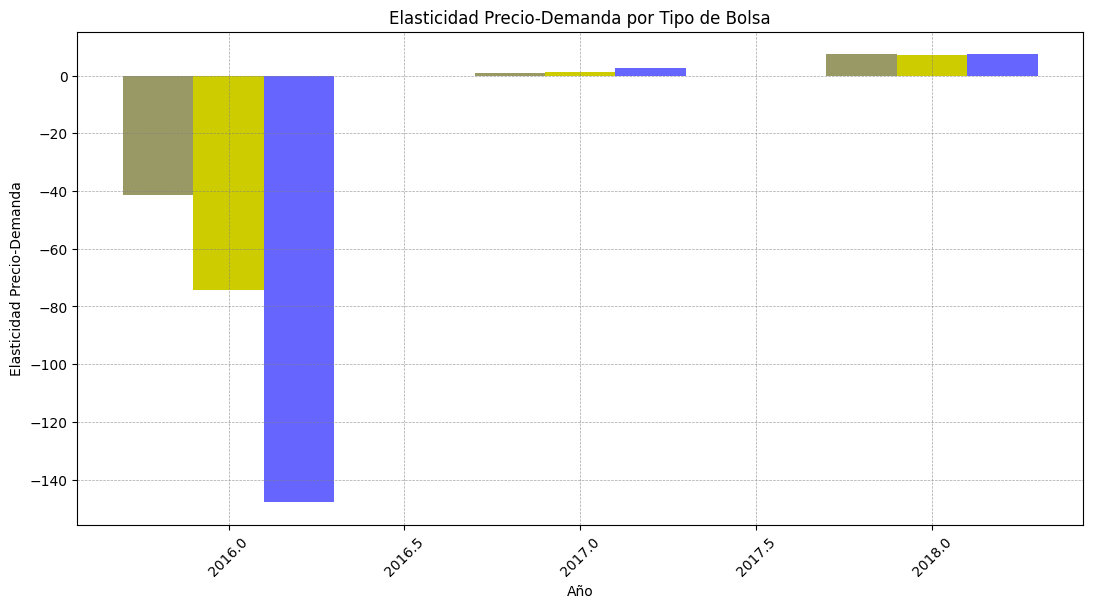

**3.3 Explicación:**
 
 El valor -0.2 ajusta la posición de las barras en el eje X. Esto es especialmente útil cuando quieres mostrar varias barras agrupadas por año (o cualquier otra categoría en el eje X) y evitar que se superpongan. 
 - df_group3_3['year'] - 0.2 para una barra,
 - df_group3_3['year'] para otra,
 - df_group3_3['year'] + 0.2 para la siguiente, y así sucesivamente.
 **Comentarios:**
 - a) Para calcular la elasticidad del precio de la demanda específica de cada tipo de bolsa (Small Bags, Large Bags, XLarge Bags) 
  en base al archivo CSV adjunto, haremos lo siguiente:
 - b) Agruparemos y sumaremos los volúmenes de ventas por cada tipo de bolsa.
 - c) Calcularemos la variación porcentual de AveragePrice y de cada tipo de bolsa por año usando pct_change.
 - d) Calcularemos la elasticidad para cada tipo de bolsa dividiendo la variación porcentual de ventas por la variación porcentual del precio.
 e) Visualizaremos los resultados en un gráfico de barras para comparar las elasticidades entre los tipos de bolsa.

In [16]:
enun.getEnunciado("3.3")
#chart.df['year'] = chart.df['Date'].dt.year
# Agrupar por año y sumar volúmenes para cada tipo de bolsa y calcular el precio promedio


df_grouped = chart.df.groupby('year').agg(
    {
        'AveragePrice': 'mean',
        'Small Bags': 'sum',
        'Large Bags': 'sum',
        'XLarge Bags': 'sum'
    }
).reset_index()

print(df_grouped)

# Calcular el cambio porcentual anual para cada tipo de bolsa y el precio promedio
df_grouped['pct_change_price'] = df_grouped['AveragePrice'].pct_change()
df_grouped['pct_change_small'] = df_grouped['Small Bags'].pct_change()
df_grouped['pct_change_large'] = df_grouped['Large Bags'].pct_change()
df_grouped['pct_change_xlarge'] = df_grouped['XLarge Bags'].pct_change()

# Calcular la elasticidad para cada tipo de bolsa
df_grouped['elasticity_small'] = df_grouped['pct_change_small'] / df_grouped['pct_change_price']
df_grouped['elasticity_large'] = df_grouped['pct_change_large'] / df_grouped['pct_change_price']
df_grouped['elasticity_xlarge'] = df_grouped['pct_change_xlarge'] / df_grouped['pct_change_price']

# Filtrar valores NaN resultantes de pct_change()
df_elasticity = df_grouped.dropna(subset=['elasticity_small', 'elasticity_large', 'elasticity_xlarge'])

# Visualizar los resultados en un gráfico de barras
chart.figureConfig(title="Elasticidad Precio-Demanda por Tipo de Bolsa",xlabel="Año",ylabel="Elasticidad Precio-Demanda")

chart.plt.bar(df_elasticity['year'] - 0.2, df_elasticity['elasticity_small'], width=0.2, label='Small Bags',color=chart.getColor())
chart.plt.bar(df_elasticity['year'], df_elasticity['elasticity_large'], width=0.2, label='Large Bags',color=chart.getColor())
chart.plt.bar(df_elasticity['year'] + 0.2, df_elasticity['elasticity_xlarge'], width=0.2, label='XLarge Bags',color=chart.getColor())

# Configuración del gráfico
chart.plt.grid(axis='y', linestyle='--', alpha=0.7)
chart.plt.show()
chart.pd.DataFrame
enun.getExplicacion("3.3")

In [17]:
enun.getEnunciado("3.3")

#CREO EL MODELO CON LAS 10 PRIMERAS COLUMNAS DE DATOS PARA LAS 10 REGIONES CON MAS VoLUMEN DE VENTA
gp_type_bags =  chart.df.groupby(['Small Bags','Large Bags','XLarge Bags']).agg({
    'AveragePrice':'mean',
    'Total Volume' : 'sum'
}).reset_index()

#Utilizo un Modelo de regresión para predecir el precio basado en la cantidad ya que
print(gp_type_bags)

enun.getExplicacion("3.3")

3.3 | **Elasticidad a Nivel de Tipo de Bolsa:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.


      Small Bags  Large Bags  XLarge Bags  AveragePrice  Total Volume
0         169.72     1719.37         0.00          2.07      12935.87
1         187.00     3487.06         0.00          1.94      15727.43
2         200.30     5843.81         0.00          1.65      18494.23
3         242.37      831.06         0.00          1.82      13935.65
4         260.45     1940.70         0.00          1.84      13438.23
...          ...         ...          ...           ...           ...
3375  2693843.02   344774.59     17495.30          0.70   10361698.17
3376  2780258.77  1200981.90      4481.41          0.95    8389918.04
3377  3351508.25   508738.57     27870.65          0.65   10323174.59
3378  3398569.92   546409.74     69152.63          0.70    9010588.32
3379  3403581.49     7838.83     51205.38          0.67   11213596.29

[3380 rows x 5 columns]


**3.3 Explicación:**
 
 El valor -0.2 ajusta la posición de las barras en el eje X. Esto es especialmente útil cuando quieres mostrar varias barras agrupadas por año (o cualquier otra categoría en el eje X) y evitar que se superpongan. 
 - df_group3_3['year'] - 0.2 para una barra,
 - df_group3_3['year'] para otra,
 - df_group3_3['year'] + 0.2 para la siguiente, y así sucesivamente.
 **Comentarios:**
 - a) Para calcular la elasticidad del precio de la demanda específica de cada tipo de bolsa (Small Bags, Large Bags, XLarge Bags) 
  en base al archivo CSV adjunto, haremos lo siguiente:
 - b) Agruparemos y sumaremos los volúmenes de ventas por cada tipo de bolsa.
 - c) Calcularemos la variación porcentual de AveragePrice y de cada tipo de bolsa por año usando pct_change.
 - d) Calcularemos la elasticidad para cada tipo de bolsa dividiendo la variación porcentual de ventas por la variación porcentual del precio.
 e) Visualizaremos los resultados en un gráfico de barras para comparar las elasticidades entre los tipos de bolsa.

3.5 | **Análisis de la Elasticidad Precios-Ventas:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.


/home/guille/.local/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


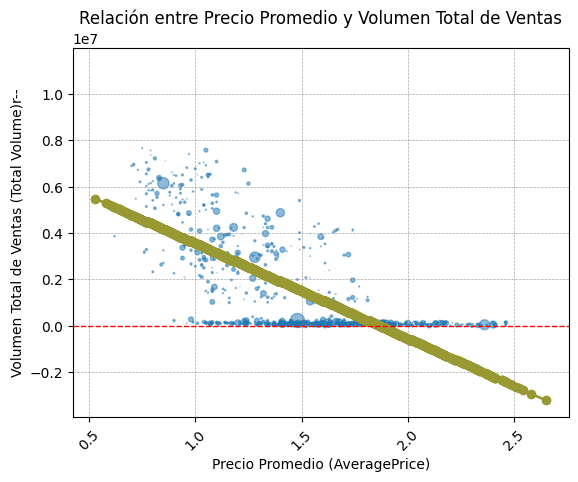

**3.5 Explicación:**
  Refleja un valor constante de 1.0 para todos los años. Esto sugiere que la **elasticidad es uniforme** en todos los años y está fijada en 1.0, lo que implica que el cambio porcentual en el volumen de ventas es exactamente proporcional al cambio porcentual en el precio promedio (es decir, un cambio del 1% en el precio se refleja en un cambio del 1% en el volumen de ventas).

In [18]:
enun.getEnunciado("3.5")

# Calcular la variación porcentual de AveragePrice y Total Volume
chart.df['pct_change_price'] = chart.df['AveragePrice'].pct_change().fillna(0)
chart.df['pct_change_volume'] = chart.df['Total Volume'].pct_change().fillna(0)

# Calcular la elasticidad precios-ventas
chart.df['elasticity'] = chart.df['pct_change_volume'] / chart.df['pct_change_price']


chart.plt.scatter(chart.df['AveragePrice'], chart.df['Total Volume'],s=chart.df['elasticity'], alpha=0.5, label='Datos')

# Ajustar una línea de tendencia para observar la relación
z = chart.np.polyfit(chart.df['AveragePrice'], chart.df['Total Volume'], 1)
p = chart.np.poly1d(z)


chart.plot(chart.df['AveragePrice'], 
           p(chart.df['AveragePrice']), 
           title="Relación entre Precio Promedio y Volumen Total de Ventas",
                   xlabel="Precio Promedio (AveragePrice)",ylabel="Volumen Total de Ventas (Total Volume)"
           "r--", label='Tendencia')

# Configuración del gráfico
chart.show()
enun.getExplicacion("3.5")

4.1 | **Cohortes Basadas en Precios Promedios Trimestrales:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.


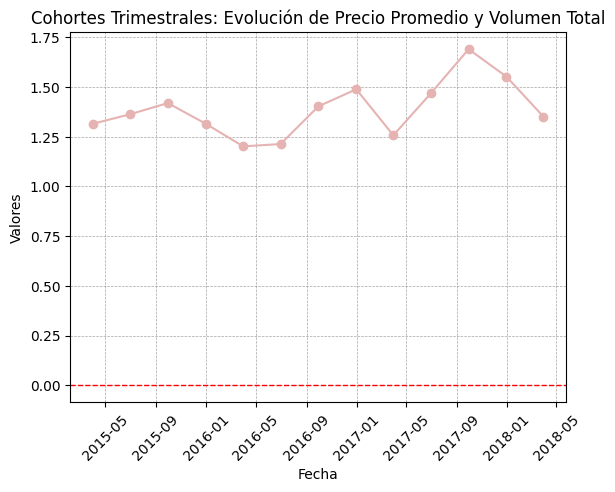

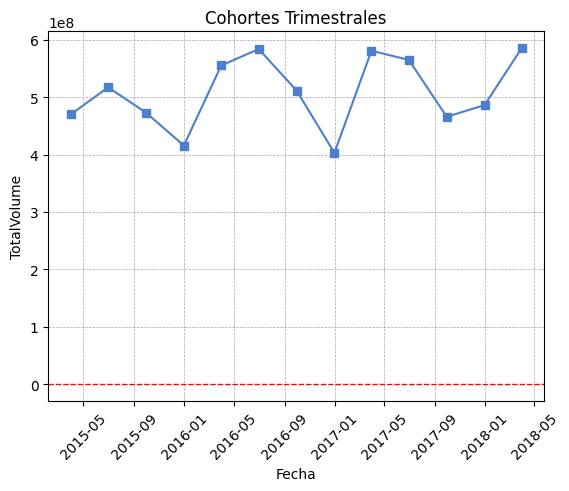

In [19]:
enun.getEnunciado("4.1")

# Agrupar los datos por trimestre y calcular el promedio de AveragePrice y la suma de Total Volume
cohortes_trimestrales = chart.df.groupby(chart.pd.Grouper(key='Date', freq='QE')).agg(
    AveragePrice=('AveragePrice', 'mean'),
    TotalVolume=('Total Volume', 'sum')
).reset_index()


# Línea para precios promedio trimestrales
chart.plot(cohortes_trimestrales['Date'], 
           cohortes_trimestrales['AveragePrice'],
           title="Cohortes Trimestrales: Evolución de Precio Promedio y Volumen Total",
           xlabel="Fecha",ylabel="Valores",
           label='Precio Promedio Trimestral',
           marker='o')
# Línea para volumen total trimestral
chart.plot(cohortes_trimestrales['Date'], 
           cohortes_trimestrales['TotalVolume'], 
           title='Cohortes Trimestrales', 
           xlabel="Fecha",ylabel="TotalVolume",
           label='Precio Promedio Trimestral',
           marker='s')

4.2 | **Cohortes por Región y Fecha:** 
   
 - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.


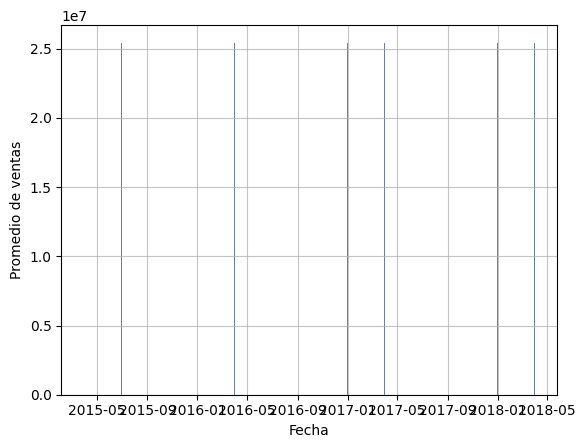

**4.2 Explicación:**
 ** Interpretación del Gráfico** 
 - El gráfico muestra la evolución de AveragePrice y Total Volume para cada región a lo largo del tiempo. 
** Las barras representan el volumen total y las líneas indican el precio promedio en cada trimestre, lo que ayuda a comparar 
** cómo las diferentes regiones responden a cambios en el mercado.

In [20]:
enun.getEnunciado("4.2")
# Agrupar los datos por región y fecha (trimestres) y calcular el promedio de precios y la suma de volumen

# Agrupa los datos por región y fecha, y calcula el promedio de precio y el total de volumen de ventas
cohortes_region_fecha = chart.df.groupby(
    ['region',chart.pd.Grouper(key='Date', freq='QE')]
).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

promedio = (cohortes_region_fecha[['AveragePrice', 'Total Volume']].mean(axis=1)).mean()

chart.plot_bar(cohortes_region_fecha['Date'],promedio,title="Cohortes",xlabel="Fecha",ylabel="Promedio de ventas",width=0.9)
enun.getExplicacion("4.2")

In [21]:
enun.getEnunciado("4.3")

bolsas_por_fecha = chart.df.groupby([pd.Grouper(key='Date', freq='ME')]).agg(
    TotalBags=('Total Bags', 'sum'),
    SmallBags=('Small Bags', 'sum'),
    LargeBags=('Large Bags', 'sum'),
    XLargeBags=('XLarge Bags', 'sum')
).reset_index()

# Crear el gráfico de líneas
# Configurar el tamaño del gráfico
chart.figureConfig(title="Evolución de Ventas por Tipo de Bolsa",
                   xlabel="Fecha",ylabel="Volumen Total de Ventas")

plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['SmallBags'], label='Small Bags', marker='o', color='blue')
plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['LargeBags'], label='Large Bags', marker='o', color='green')
plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['XLargeBags'], label='XLarge Bags', marker='o', color='orange')

# Configuración del gráfico
plt.legend(title='Tipo de Bolsa')
plt.show()
enun.getExplicacion("4.3")

4.3 | **Cohortes por Región y Fecha:** 
   
- **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.


NameError: name 'pd' is not defined

In [ ]:
enun.getEnunciado("4.4")
# Agrupar por region y Date, calculando el total de ventas
ventas_por_region_fecha = chart.df.groupby([chart.pd.Grouper(key='Date', freq='ME'), 'region']).agg(
    TotalVolume=('Total Volume', 'sum')
).reset_index()

# Clasificar las regiones en cohortes según el volumen de ventas promedio total
# Calculamos el volumen promedio para cada región
volumen_promedio_por_region = ventas_por_region_fecha.groupby('region')['TotalVolume'].mean()

# Definimos las cohortes: Baja, Media, Alta en función del cuartil
cuartiles = chart.pd.qcut(volumen_promedio_por_region, 3, labels=['Baja', 'Media', 'Alta'])

# Agregar la cohorte a cada región en el DataFrame original
ventas_por_region_fecha['Cohorte'] = ventas_por_region_fecha['region'].map(cuartiles)

# Crear el gráfico de líneas para cada cohorte
chart.figureConfig(title="Cohortes de Clientes Basadas en Ventas por Región",
                   xlabel="Fecha",ylabel="Volumen Total de Ventas")

for cohorte in ventas_por_region_fecha['Cohorte'].unique():
    subset = ventas_por_region_fecha[ventas_por_region_fecha['Cohorte'] == cohorte]
    subset_grouped = subset.groupby('Date')['TotalVolume'].sum()
    
    chart.plt.plot(subset_grouped.index, subset_grouped, label=f'Cohorte {cohorte}')

chart.plt.savefig("graficas/grafica_4_4.png")
chart.plt.legend(title='Cohorte de Clientes')
chart.plt.show()
enun.getExplicacion("4.4")

In [ ]:
enun.getEnunciado("4.5")
chart.df['Month'] = chart.df['Date'].dt.to_period('M')
ventas_mensuales = chart.df.groupby('Month')['Total Volume'].sum().reset_index()

# Crear una columna para identificar la cohorte de cada mes como mes inicial de la cohorte
ventas_mensuales['Cohorte'] = ventas_mensuales['Month']

# Convertir de periodo a fecha para simplificar manipulación posterior
ventas_mensuales['Month'] = ventas_mensuales['Month'].dt.to_timestamp()

# Crear una tabla pivote para mostrar la retención por cohorte
retencion_cohorte = pd.DataFrame()

for i, mes in enumerate(ventas_mensuales['Cohorte']):
    # Calcular el volumen inicial de la cohorte y el volumen en meses subsiguientes
    ventas_inicial = ventas_mensuales.loc[ventas_mensuales['Cohorte'] == mes, 'Total Volume'].values[0]
    ventas_sucesivas = ventas_mensuales['Total Volume'].iloc[i:].reset_index(drop=True) / ventas_inicial
    retencion_cohorte[mes] = ventas_sucesivas


chart.figureConfig(title="Retención de Ventas por Cohorte",
                   xlabel="Meses desde el Inicio de la Cohorte",ylabel="Tasa de Retención de Ventas")


for cohorte in retencion_cohorte.columns:
    plt.plot(retencion_cohorte[cohorte].values, label=f'Cohorte {cohorte.strftime("%Y-%m")}')
    
plt.legend(title="Cohorte Inicial")
plt.show()

In [ ]:
enun.getEnunciado("5.1")
cols = chart.df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']].reset_index()

# Calcular la matriz de correlación
correlation_matrix = cols.corr()

# Crear el heatmap
chart.figureConfig(title="Matriz de Correlación entre Variables Numéricas")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.grid(False)
plt.show()

In [ ]:
enun.getEnunciado("5.2")
chart.figureConfig(title="Relación entre Average Price y Total Volume con Regresión Lineal",xlabel="Average Price",ylabel="Total Volume")
sns.scatterplot(x='AveragePrice', y='Total Volume', data=chart.df, color="blue", label="Datos")
sns.regplot(x='AveragePrice', y='Total Volume', data=chart.df, scatter=False, color="red", label="Regresión Lineal")
plt.show()

In [ ]:

# Obtener los coeficientes de un ajuste polinómico de grado 2
coef = np.polyfit(chart.df['AveragePrice'], chart.df['Total Volume'], 2)
poly_eq = np.poly1d(coef)
sns.scatterplot(x='AveragePrice', y='Total Volume', data=chart.df, color="blue", label="Datos")

# Línea de regresión lineal
sns.regplot(x='AveragePrice', y='Total Volume', data=chart.df, scatter=False, color="orange", label="Regresión Lineal")

# Línea de regresión polinómica
x_range = np.linspace(chart.df['AveragePrice'].min(), chart.df['AveragePrice'].max(), 100)
plt.plot(x_range, poly_eq(x_range), color="green", label="Regresión Polinómica (Grado 2)")
plt.show()

In [ ]:

enun.getEnunciado("5.3")

group_data = chart.df.groupby(chart.pd.Grouper(key='Date', freq='QE')).agg(
   {
       'AveragePrice': 'mean',
       'Total Volume': 'mean'
   }
).reset_index()
print(group_data)
train_data, test_data = chart.train_test_split(group_data, test_size=0.2, random_state=42)
modelo = chart.linear_model()
modelo.fit(train_data,test_data)
test_data

chart.getExplicacion("5.3")

In [ ]:
grouped_data = chart.df.grouptby()

In [ ]:
enun.getEnunciado("5.4")
chart.formatDate('Date')
group_trimestre = chart.df.groupby(pd.Grouper(freq="Q",key="Date")).reset_index()
group_trimestre